Student Performance Indication

Machine learning lifecycle:

1. Understanding: Problem and Goal
2. Data Collection
3. Data checks
4. EDA
5. Pre-processing
6. Training
7. Model Selection (validation, evaluation)


1. 
The Problem: How are students exam results affected by external variables
The Goal: Predict how well a student will perform in their exam

2. 
Data Collection:
Source: https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?resource=download


In [33]:
# Import Libraries and Load Data


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [34]:
# Load the dataset
df = pd.read_csv('data/Stud.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [35]:
shape = df.shape
print(f"Data shape: {shape}")

Data shape: (1000, 8)


About the Data:

- gender (m/f)
- race/ethnicity (Group: A-E)
- Parental Education level: School - Degree
- Lunch prior to exam: Free/Reduced/Standard
- Math result
- Reading score
- Writing score 

3. Data Checks

- Missing 
- Duplicates
- Data type
- No. of Unique values
- Stats
- Cats in categorical columns


In [36]:
df.isnull().sum()
# Check for missing values

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [37]:
df.duplicated().sum()
# Check for duplicates

np.int64(0)

In [38]:
df.info()
# Get information about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [39]:
df.nunique()
# Check unique values in each column

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [40]:
df.describe().T
# Get descriptive statistics

,count,mean,std,min,25%,50%,75%,max
math score,1000.0,66.089,15.163080,0.0,57.00,66.0,77.0,100.0
reading score,1000.0,69.169,14.600192,17.0,59.00,70.0,79.0,100.0
writing score,1000.0,68.054,15.195657,10.0,57.75,69.0,79.0,100.0


Insight:
- Tight mean range (66-68.05)
- Tight SD (14.6-15.19)
- Math min = 0
- Writing min = 10
- Reading min = 17

Data Exploration

In [41]:
df['gender'].unique()
df['race/ethnicity'].unique()
df['parental level of education'].unique()
df['lunch'].unique()
df['test preparation course'].unique()

# Check unique values in categorical columns

array(['none', 'completed'], dtype=object)

In [42]:
print("Categories in 'gender' variable:     ",end=" " )
print(df['gender'].unique())

print("Categories in 'race/ethnicity' variable:  ",end=" ")
print(df['race/ethnicity'].unique())

print("Categories in'parental level of education' variable:",end=" " )
print(df['parental level of education'].unique())

print("Categories in 'lunch' variable:     ",end=" " )
print(df['lunch'].unique())

print("Categories in 'test preparation course' variable:     ",end=" " )
print(df['test preparation course'].unique())

Categories in 'gender' variable:      ['female' 'male']
Categories in 'race/ethnicity' variable:   ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in'parental level of education' variable: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:      ['standard' 'free/reduced']
Categories in 'test preparation course' variable:      ['none' 'completed']


In [43]:
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = df.select_dtypes(include=['object']).columns.tolist()
print(f"Numerical features: {numerical_features}")
print(f"Categorical features: {categorical_features}")

Numerical features: ['math score', 'reading score', 'writing score']
Categorical features: ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


Add columns for Total and AVG scores

In [44]:
df['total score'] = df['math score'] + df['reading score'] + df['writing score']
df['average'] = df['total score']/3
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [45]:
reading_full = df[df['reading score'] == 100]['average'].count()
writing_full = df[df['writing score'] == 100]['average'].count()
math_full = df[df['math score'] == 100]['average'].count()

print(f'Number of students with full marks in Maths: {math_full}')
print(f'Number of students with full marks in Writing: {writing_full}')
print(f'Number of students with full marks in Reading: {reading_full}')

Number of students with full marks in Maths: 7
Number of students with full marks in Writing: 14
Number of students with full marks in Reading: 17


In [46]:
reading_less_20 = df[df['reading score'] <= 20]['average'].count()
writing_less_20 = df[df['writing score'] <= 20]['average'].count()
math_less_20 = df[df['math score'] <= 20]['average'].count()

print(f'Number of students with less than 20 marks in Maths: {math_less_20}')
print(f'Number of students with less than 20 marks in Writing: {writing_less_20}')
print(f'Number of students with less than 20 marks in Reading: {reading_less_20}')

Number of students with less than 20 marks in Maths: 4
Number of students with less than 20 marks in Writing: 3
Number of students with less than 20 marks in Reading: 1


Students have performed better in reading, with maths being the subject with the poorest performance.

EDA Visualisation

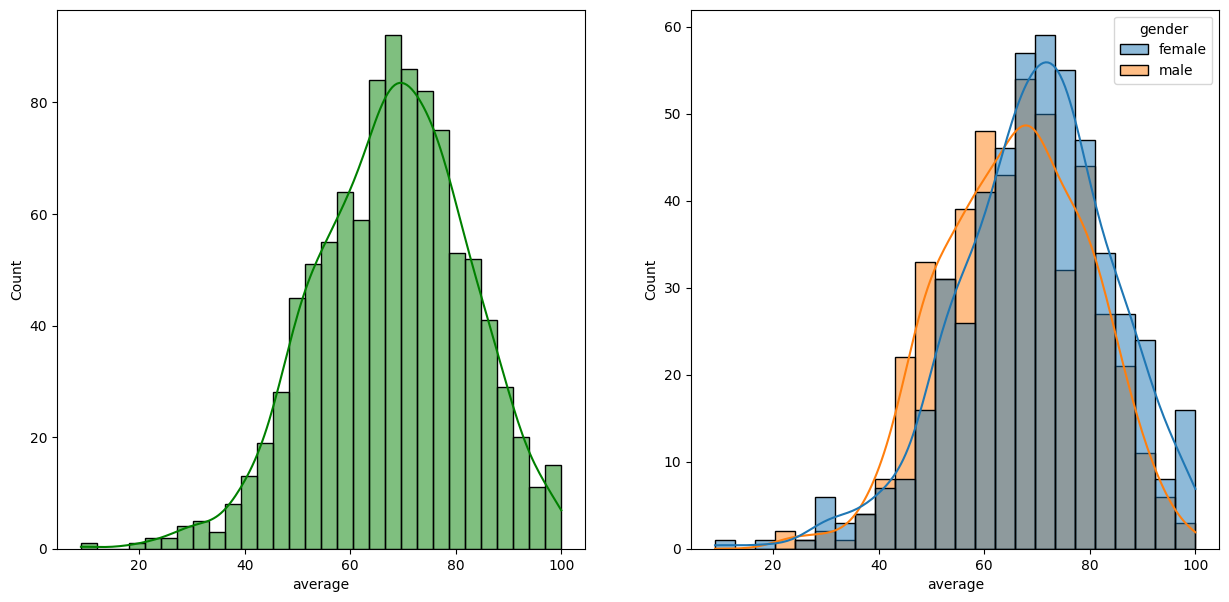

In [47]:
# Visualise the distribution of test scores
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df, x='average', bins=30, kde=True, color='g')
plt.subplot(122)
sns.histplot(data=df, x='average', kde=True, hue='gender')
plt.show()


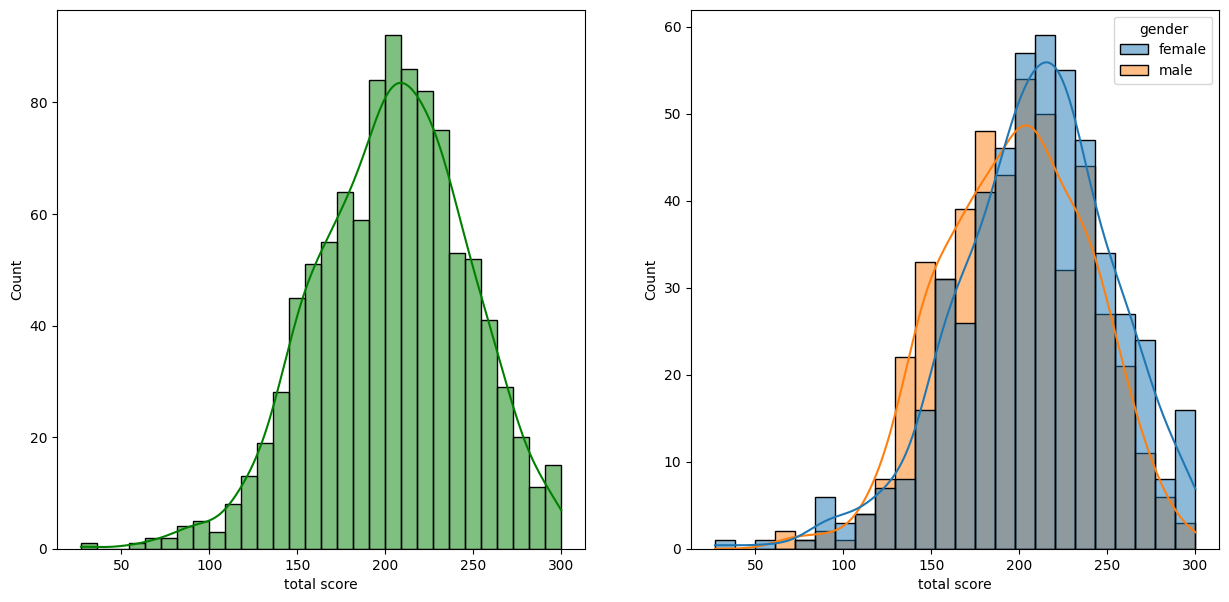

In [48]:
# Visualise the distribution of test scores
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df, x='total score', bins=30, kde=True, color='g')
plt.subplot(122)
sns.histplot(data=df, x='total score', kde=True, hue='gender')
plt.show()


Insight:
Females perform, as a whole, better than males

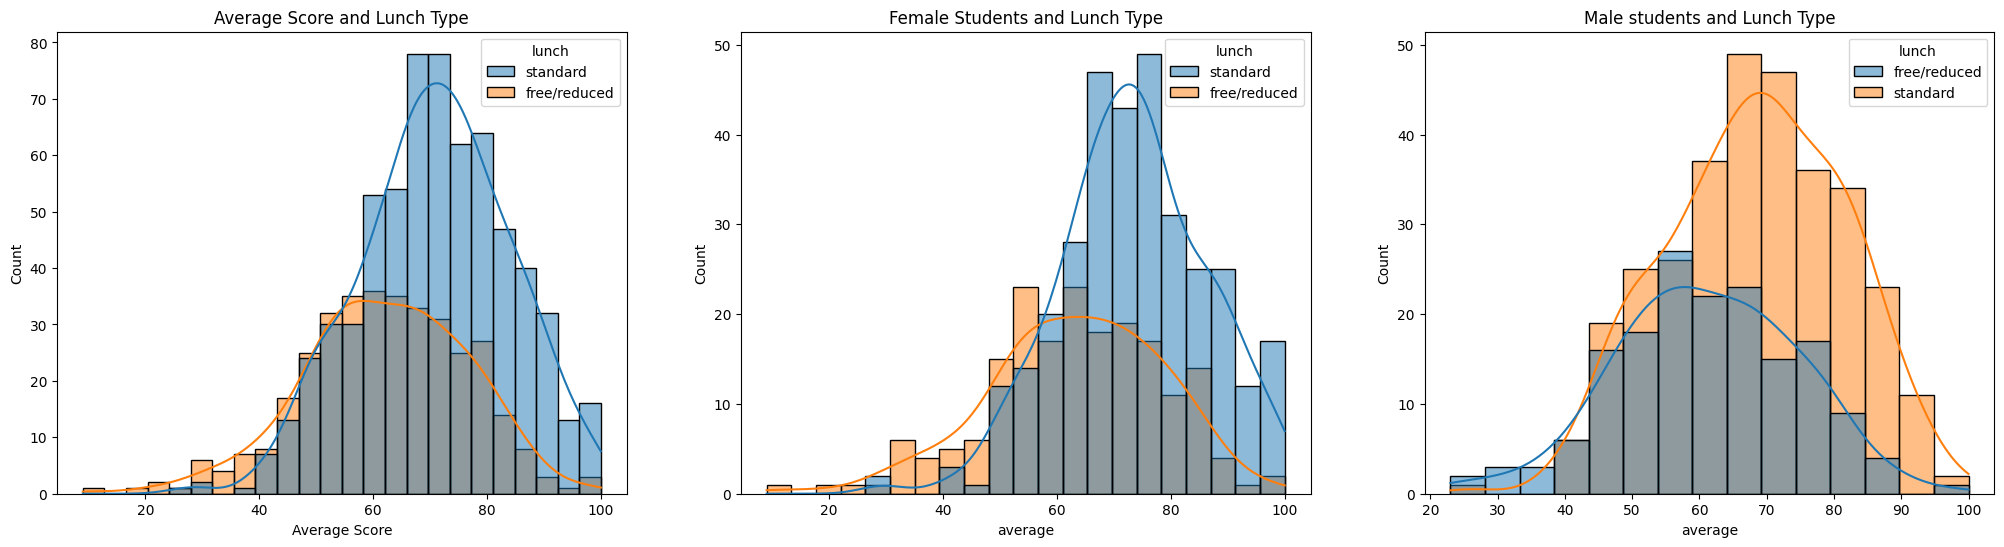

In [49]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(131)
sns.histplot(data=df,x='average',kde=True,hue='lunch')
plt.xlabel("Average Score")
plt.title("Average Score and Lunch Type")
plt.subplot(132)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='lunch')
plt.title("Female Students and Lunch Type")
plt.subplot(133)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='lunch')
plt.title("Male students and Lunch Type")
plt.show()

Lunch:
- Suggests lunch assists in the students performance for both m and f.

In [ ]:
# Create subplots for visualizing the relationship between average scores and parental education level
fig, axs = plt.subplots(1, 3, figsize=(25, 6))

# Plot for all students
plt.subplot(131)
sns.histplot(data=df, x='average', kde=True, hue='parental level of education')
plt.title("All Students")
plt.xlabel("Average Score")

# Plot for male students
plt.subplot(132)
sns.histplot(data=df[df.gender == 'male'], x='average', kde=True, hue='parental level of education')
plt.title("Male Students")
plt.xlabel("Average Score")

# Plot for female students
plt.subplot(133)
sns.histplot(data=df[df.gender == 'female'], x='average', kde=True, hue='parental level of education')
plt.title("Female Students")
plt.xlabel("Average Score")

# Display the plots
plt.tight_layout()
plt.show()# Create subplots for visualizing the relationship between average scores and parental education level
fig, axs = plt.subplots(1, 3, figsize=(25, 6))

# Plot for all students
plt.subplot(131)
sns.histplot(data=df, x='average', kde=True, hue='parental level of education')
plt.title("All Students")
plt.xlabel("Average Score")

# Plot for male students
plt.subplot(132)
sns.histplot(data=df[df.gender == 'male'], x='average', kde=True, hue='parental level of education')
plt.title("Male Students")
plt.xlabel("Average Score")

# Plot for female students
plt.subplot(133)
sns.histplot(data=df[df.gender == 'female'], x='average', kde=True, hue='parental level of education')
plt.title("Female Students")
plt.xlabel("Average Score")

# Display the plots
plt.tight_layout()
plt.show()